# Probability

##### Keywords: probability, probability rules, marginal, conditional, independence, bayes theorem, random variables

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', False)
import seaborn as sns
sns.set_style("white")

## What is probability?

Suppose you were to flip a coin. Then you expect not to be able to say whether the next toss would yield a heads or a tails.  You might tell a friend that the odds of getting a heads is equal to to the odds of getting a tails, and that both are $1/2$.

This intuitive notion of odds is a **probability**. It comes about because of our physical **model** of the world: say that because of our faith in the U.S. Mint, we might be willing to, without having seen any tosses, say that the coin is fair. In other words, there are two choices, both of which are equally likely.

### Probability from Symmetry 

Consider another example. If we were tossing a 'fair' six-sided dice, we may thus equivalently say that the odds of the dice falling on any one of its sides is $1/6$. Indeed if there are $C$ different equally likely possibilities, we'd expect that the probability of any one particular outcome would be $1/C$.

The examples of the coin as well as the dice illustrate the notion of probability springing from **symmetry**. Here we think of probability of of the number 4 on the dice as the ratio:

$$\frac{Number\: of\: cases\: for\: number\: 4}{number\: of\: possibilities} = \frac{1}{6},$$
 assuming equally likely possibilities.

In other words, the symmetry refers to the notion that when there are multiple ways for an event to happen, and that then we have an intuitive **model** of fairness between these ways that tells us that none of these are any more likely than the other. 

### Probability from a model

Thus one might think of  symmetry as providing a model.  There are also other kinds of models.

Think of an event like an election, say a presidential election. You cant exactly run multiple trials of the election: its a one-off event. But you still want to talk about the likelyhood of a candidate winning. However people do make **models** of elections, based on inputs such as race, age, income, sampling polls, etc. They assign likeyhoods of candidates winning and run large numbers of **simulations** of the election, making predictions based on that. Forecasters like Nate Silver, Sam Wang, And Drew Linzer, made incredibly successfull predictions of the 2012 elections.

Or consider what a weather forecaster means when he or she says there is a 90% chance of rain today. Presumably, this conclusion has been made from many computer **simulations** which take in the weather conditions known in the past, and propagated using physics to the current day. The simulations give different results based on the uncertainty in the measurement of past weather, and the inability of the physics to capture the phenomenon exactly (all physics is some approximation to the natural world). But 90% of these simulations show rain.

In all of these cases, there is either a model (a fair coin, an election forecasting model, a weather differential equation), or an experiment ( a large number of coin tosses) that is used to **estimate** a probability, or the odds, of an **event** $E$ occuring. 

#### Combining models and observations

In all of these cases, probability is something we speak of, for observations we are to make in the future. And it is something we assign, based on the *model* or belief of the world we have, or on the basis of past observations that we have made, or that we might even imagine that we would make.

Consider some additional examples. You might ask the probability of the Yankees winning the next baseball game against the Red Sox. Or you might ask for the probability of a launch failure for the next missile protecting Tel-Aviv. These are not academic questions: lots of betting money and lives depend upon them respectively. In both cases there is some past data, and some other inputs such as say, weather conditions, which might be used to construct a model, which is then used to predict the fate of the next game or launch. 

They key takeaway is this: for some reasons, and possibly using some data, we have constructed a model of the universe. In other words, we have combined **prior** beliefs and past frequencies respectively. This notion of such combination is yet another notion of probability, called the **Bayesian** notion of probability. And we can now use this model to make predictions, such us the future odds of a particular event happening.

### Probability from frequency

Consider doing a large number of coin flips. You would do, or imagine doing, a large number of flips or **trials** $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be 
$$\frac{N_H}{N}.$$

This is the notion of probability as a **relative frequency**: if there are multiple ways an **event** like the tossing of a coin can happen, lets look at multiple trials of the event and see the fraction of times one or other of these ways happened. 

This jibes with our general notion of probability from symmetry: indeed you can think of it as an experimental verificaltion of a symmetry based model.

#### Simulating the results of the model

We dont have a coin right now. So let us **simulate** this process on a computer. To do this we will use a form of the **random number generator** built into `numpy`. In particular, we will use the function `np.random.choice`, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6). 

In [3]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: H T H H T T H H T H H T H T H T H T H T T H T H H T H T H H H H T H T H T H T H
Number of Heads: 23
p1 = Number of Heads/Total Throws: 0.575


Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

In [4]:
def make_throws(N):
    throws=throw_a_coin(N)
    if N <= 100:
        print("Throws:"," ".join(throws))
    else:
        print("First 100 Throws:"," ".join(throws[:100]))
    print("Number of Heads:", np.sum(throws=='H'))
    print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/N)
make_throws(40)

Throws: H T H H H T H T T T H T H T H T T H T H T T T T T H T H H H T T T H H H T H H T
Number of Heads: 19
p1 = Number of Heads/Total Throws: 0.475


Let's do many more trials

In [5]:
make_throws(1000)

First 100 Throws: H H H H H T T T T H T H T T H T T T T T T T H H T H H T T H T H H H H H T T H T H H H H T H H T T T H T T H H T H H H T H H H T T H T H H T H T T T H T H T T H T T T H T H T T H T H T H T T T T H T H
Number of Heads: 467
p1 = Number of Heads/Total Throws: 0.467


And even more:

In [6]:
make_throws(10000)

First 100 Throws: T T H H T H T H H T T H H T H T H T H H H H T T T H H H T T H H T H T H H T H T T H T T H T H T H T H H T T T H T T T H T H H H T T H H T T H H T H H H T H T T H H H T H H H H H T T H H H H H H T H T
Number of Heads: 5054
p1 = Number of Heads/Total Throws: 0.5054


As you can see, the larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically:

/Users/newscred/.local/share/virtualenvs/Stochastic-Optimization-imJ319fN/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


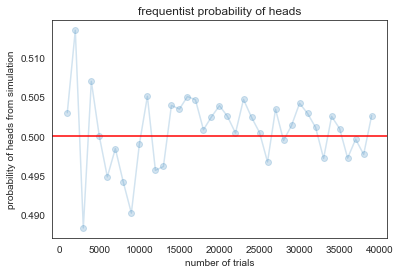

In [7]:
trials=np.arange(0, 40000, 1000)
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.2);
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

Thus, the true odds **fluctuate** about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having `np.random.choice` choose between two possibilities with equal probability), with the fluctuations becoming much smaller (we shall talk a lot more about this later in the book). These **fluctations** are what give rise to probability distributions.

Each finite length run is called a **sample**, which has been obtained from the **generative** model of our fair coin. Its called generative as we can use the model to generate, using simulation, a set of samples we can play with to understand a model. Such **simulation from a model** is a key technique which we will come back to again and again in learning from data.

## The rules of probability

We have seen multiple notions of probability so far. One might assign probabilities based on symmetry, for eg, 2 sides of a fair coin, or six sides of a fair dice. One might assign probabilities based on doing an experiment. such as the long run number of heads in many coin flips. One might assign probabilities based on beliefs; and one might even assign probabilities to events that have no chance of repeating, such as the 2012 presidential election, or the probability of rain between 2pm and 6pm today.

Thus, the very definition of probability seems to be wishy-washy and subjective. Thus you might wonder how you might work with such probabilities. For this, we turn to the rules of probability.

The rules dont care where our probabilities come from, as to how we estimated them, as long as they behave in intuitively sensible ways. 

Consider an example: 

E is the event of getting a heads in a first coin toss, and F is the same for a second coin toss. Here $\Omega$, the set of all possibilities that can happen when you toss two coins is $\{HH, HT, TH, TT\}$. Since E only specifies that the first toss is heads, $E=\{HT, HH\}$. Similarly $F= {HH, TH}$ The set of all events that are not E then is $\tilde{E} = {TH, TT}$.

These sets, along with some others are captured in the venn diagram below:

![2 coin toss venn diagram](../images/venn.png) 


### The Multiply/And/Intersection Formula for independent events

If E and F are independent events, the probability of both events happening together $P(EF)$ or $P(E \cap F)$ (read as E and F or E intersection F, respectively) is the multiplication of the individual probabilities.

$$ P(EF) = P(E) P(F) .$$

If you made the two independent coin tosses in our example, and you had a fair coin, the probability of both coming up heads is $(1/2)*(1/2) = 1/4$. This makes intuitive sense: half the time the first coin comes up heads, and then 1/2 the time the second coin comes up heads, so its 1/4 of the times that both come up heads.


### The Plus/Or/Union Formula 

We can now ask the question, what is $P(E+F)$, the odds of E alone, F alone, or both together. Translated into English, we are asking, whats the probability that only the first toss was heads, or only the second toss was heads, or that both came up heads?  Or in other words, what are the odds of at least one heads? The answer to this question is given by the rule:

$$P(E+F) = P(E) + P(F) - P(EF),$$ 

the "plus" formula, where E+F, read as E or F (also $E \cup F$, reads as E union F) means "E alone, F alone, **or** both together". This rule is a hard one to understand and has a lot of notation, so lets examine it in some detail.

There are four ways that these two tosses can arrange themselves, as illustrated by this diagram, adapted from the [probability chapter](http://www.feynmanlectures.caltech.edu/I_06.html) in Feynman's lectures on Physics..you should read it!.

![2 coin flips](../images/2flips.png) 

We can have a HH, HT, TH, or TT. In three out of 4 of these cases, either the first toss was heads, or the second was heads. Thus $P(E+F)=3/4$. 

The formula says, add the odds that "the first toss was a heads, without worrying about the second one (1/2), to the probability that the second toss was a heads, without worrying about the first one" (1/2). Since this double counts the situation where both are heads; subtract that (1/4):

$$\begin{eqnarray}
P(E+F) \, & = &\, P(E) + P(F) - P(EF)\\
\frac{3}{4} \, & = &\, \frac{1}{2} + \frac{1}{2} - \frac{1}{4} 
\end{eqnarray}$$

Armed with these two formulas, we can tackle the world of conditional and marginal probabilities, and Bayes theorem!

### Formally summarizing the rules

If $X$ and $Y$ are two events and $p(X)$ is the probability of the event $X$ to happen. $X^- $ is the complement of $X$, the event which is all the occurrences which are not in $X$. $X+Y$ is the union of $X$ and $Y$; $X,Y$ is the intersection of $X$ and $Y$. (Both $X+Y$ and $X,Y$ are also events.)

### The very fundamental rules of probability:

1. $p(X) >=0$;  probability must be non-negative

2. $0 ≤ p(X) ≤ 1 \;$ $X$ has probability range from 0 to 1. 

3. $p(X)+p(X^-)=1 \;$ $X$ must either happen or not happen. These last two aximoms can be thought of as saying that the probabilities if all events put tohether must sum to 1.

5. $p(X+Y)=p(X)+p(Y)−p(X,Y) \;$ $X$ can happen and $Y$ can happen but we must subtract the cases that are happening together so we do not over-count.



## Random Variables

To link the notion of events such as $E$ and collections of events, or *probability spaces* $\Omega$ to data, we must introduce the concept of random variables. The following definition is taken from Larry Wasserman's All of Stats.

**Definition**. A random variable is a mapping

$$ X: \Omega \rightarrow \mathbb{R}$$

that assigns a real number $X(\omega)$ to each outcome $\omega$. $\Omega$ is the sample space. Points
$\omega$ in $\Omega$ are called sample outcomes, realizations, or elements. Subsets of
$\Omega$ are called Events. Say $\omega = HHTTTTHTT$ then $X(\omega) = 3$ if defined as number of heads in the sequence $\omega$.

We will assign a real number P(A) to every event A, called the probability of
A. We also call P a probability distribution or a probability measure.
To qualify as a probability, P must satisfy the three axioms (non-negative, $P(\Omega)=1$, disjoint probs add).

## Marginals and conditionals, and Bayes Theorem

The diagram  below taken from Bishop may be used to illustrate the concepts of conditionals and marginals. Consider two random variables, $X$, which takes the values ${x_i}$ where
$i = 1,...,M$, and $Y$, which takes the values ${y_j}$ where $j = 1,...,L$. The number of instances for which $X = x_i$ and $Y = y_j$ is $n_{ij}$. The number of points in column i where $X=x_i$ is $c_i$, and for the row where $Y = y_j$ is $r_j$.


![m:bishopprob](../images/bishop-prob.png)

Then the **joint probability** of having  $p(X = x_i, Y= y_j)$ is in the asymptotic limit of large numbers in the frequency sense of probability $n_{ij}/N$ where is the total number of instances. The $X$ **marginal**,  $p(X=x_i)$ can be obtained by summing instances in all the cells in the  i'th column:

$$p(X=x_i) = \sum_j p(X=x_i, Y=y_j)$$

Lets consider next only those instances for which  $X=x_i$. This means that we are limiting our analysis to the ith row. Then, we write the **conditional probability** of $Y = y_j$ given $X = x_i$ as $p(Y = y_j \mid X = x_i)$. This is the asymptotic fraction of these instances where $Y = y_j$ and is obtained by dividing the instances in the cell by those in the comumn as 

$$p(Y = y_j \mid X = x_i) = \frac{n_{ij}}{c_i}.$$

A little algebraic rearrangement gives:

$$p(Y = y_j \mid X = x_i) = \frac{n_{ij}}{c_i} = \frac{n_{ij}}{N} / \frac{c_i}{N},$$

or:

$$p(Y = y_j \mid X = x_i) \times p(X=x_i) =  p(X=x_i, Y=y_j).$$

This is the product rule of probability with conditionals involved.

Let us simplify the notation by dropping the $X=$ and $Y=$.

Then we can write the marginal probability of x as a sum over the joint distribution of x and y where we sum over all possibilities of y,

$$p(x) = \sum_y p(x,y) $$.

We can rewrite a joint distribution as a product of a conditional and marginal probability,

$$ p(x,y) = p(y\mid x) p(x) $$

The product rule is applied repeatedly to give expressions for the joint
probability involving more than two variables. For example, the joint distribution over three
variables can be factorized into a product of conditional probabilities:

$$ p(x,y,z) = p(x|y,z) \, p(y,z) = p(x |y,z) \, p(y|z) p(z) $$

### Bayes rule

Observe that 

$$ p(x,y) = p(y\mid x) p(x) = P(x\mid y)p(y).$$

Given the product rule one can derive the Bayes rule, which plays a central role in a lot of the things we will be talking:

$$ p(y\mid x) = \frac{p(x\mid y) \, p(y) }{p(x)} = \frac{p(x\mid y) \, p(y) }{\sum_{y'} p(x,y')} = \frac{p(x\mid y) \, p(y) }{\sum_{y'} p(x\mid y')p(y')}$$

### Independence

Two variables are said to be independent if their joint distribution factorizes into a product of two marginal probabilities:

$$ p(x,y) = p(x) \, p(y) $$ 

 Another consequence of independence is that if $x$ and $y$ are independent, the conditional probability of $x$ given $y$ is just the probability of $x$:

$$ p(x|y) = p(x) $$

In other words, by conditioning on a particular $y$, we have learned nothing about $x$ because of independence. Two variables $x$ and $y$ and said to be conditionally independent of $z$ if the following holds:

$$ p(x,y|z) = p(x|z) p(y|z) $$

Therefore, if we learn about z, x and y become independent. Another way to write that $x$ and $y$ are conditionally independent of $z$ is 

$$ p(x| z, y) = p(x|z) $$

In other words, if we condition on $z$, and now also learn about $y$, this is not going to change the probability of $x$. It is important to realize that conditional independence between $x$ and $y$ does not imply independence between $x$ and $y$. 

### Application of Bayes Theorem

>Sally Clark, a lawyer who lost her first son at 11 weeks and her second at 8 weeks, was convicted in 1999. A prominent pediatrician, Sir Roy Meadow, had testified for the prosecution about Sudden Infant Death Syndrome, known as SIDS in the U.S. and cot death in Britain. Citing a government study, Meadow said the incidence of one SIDS death was one in 8,500 in a family like Clark’s–stable, affluent, nonsmoking, with a mother more than 26 years old.

>Then, despite the fact that some families are predisposed to SIDS, Meadow assumed erroneously that each sibling’s death occurred independently of the other. Multiplying 8,500 by 8,500, he calculated that the chance of two children dying in a family like Sally Clark’s was so rare–one in 73 million–that they must have been murdered.

(from http://www.mcgrayne.com/disc.htm)

```
p(child 1 dying of sids) = 1/8500

P(child 2 dying of sids) = 1/100
```

>First, we look at natural causes of sudden infant death. The chance of one random infant dying from SIDS was about 1 in 1,300 during this period in Britain. Meadow’s argument was flawed and produced a much slimmer chance of natural death. The estimated odds of a second SIDS death in the same family was much larger, perhaps one in 100, because family members can share a common environmental or genetic propensity for SIDS.

>Second, we turn to the hypothesis that the babies were murdered. Only about 30 children out of 650,000 annual births in England, Scotland, and Wales were known to have been murdered by their mothers. The number of double murders must be much lower, estimated as 10 times less likely.

```
p(S2 = both children dying of sids) =  0.000007
p(notS2 = not both dying of sids) =  0.999993

Data: both children died unexpectedly
```

So now ask, whats:

```
p(data | S2) = 1
p(data | notS2) = ? both died but not SIDS. Murder? =  30/650000	× 1/10 = 0.000005
```

We want to calculate the "posterior probability":

```
p(S2 | data) = P(data | S2) P(S2) /(P(data | S2) P(S2) + P(data|notS2)P(notS2))
= 1*0.000007/(1*0.000007 + 0.000005*0.999993)
=0.58
```

58% chance of having died from SIDS!

Sally Clark spent **3 years** in jail.
